### Building a decision tree model to make predictions on the right drug to prescibe for a patient

## Import Necessary Libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Read file

In [55]:
drug_df = pd.read_csv("drug200.csv")
drug_df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Data Preprocessing

In [56]:
# Seprate features from target 
features = drug_df.iloc[:, :5]
target = drug_df["Drug"]

In [57]:
# Dummy Categorical Features
features = pd.get_dummies(features, dtype=float)
features.head()

,Age,Na_to_K,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,25.355,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,47,13.093,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,47,10.114,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,28,7.798,1.0,0.0,0.0,0.0,1.0,1.0,0.0
4,61,18.043,1.0,0.0,0.0,1.0,0.0,1.0,0.0


## Split Data

In [58]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## build and fit model

### i. Using enrtropy

In [59]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth=4, random_state=42)
drugTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)

## Make predictions and evaluate model

In [60]:
ypred = drugTree.predict(x_test)
accuracy_score(y_test, ypred)

1.0

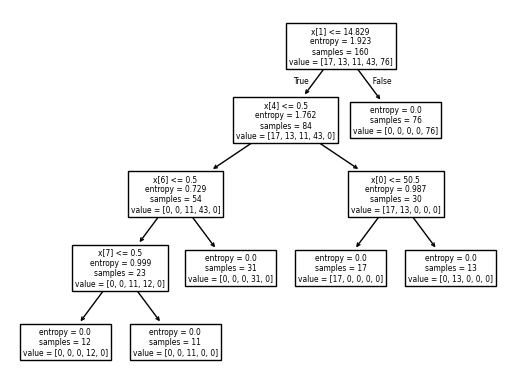

In [61]:
plot_tree(drugTree)
plt.show()

### ii. Using log-loss

In [68]:
drugTree = DecisionTreeClassifier(criterion="log_loss", max_depth=4, random_state=42)
drugTree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=4, random_state=10)

In [69]:
ypred = drugTree.predict(x_test)
accuracy_score(y_test, ypred)

1.0

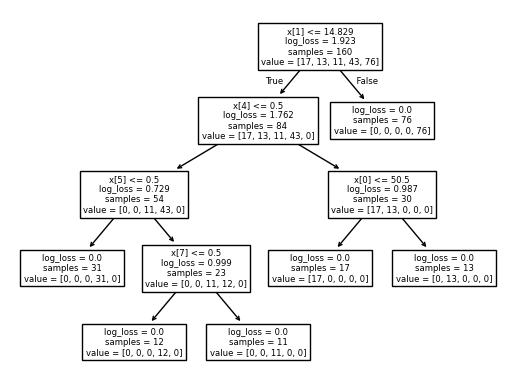

In [70]:
plot_tree(drugTree)
plt.show()

### iii. Using Gini impurity

In [65]:
drugTree = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
drugTree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [66]:
ypred = drugTree.predict(x_test)
accuracy_score(y_test, ypred)

1.0

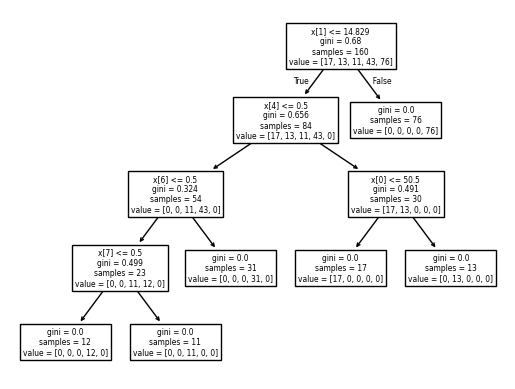

In [67]:
plot_tree(drugTree)
plt.show()